# CRAG-ReAct: Intelligent Retrieval & Reasoning
## Robust Retrieval-Augmented Generation with Step-by-Step Reasoning

Welcome to this Jupyter notebook exploring cutting-edge techniques in artificial intelligence. We'll be diving into a powerful combination of two advanced approaches:

1. **Corrective Retrieval Augmented Generation (CRAG)**
2. **Reasoning+Acting (ReAct)**


Let's get started!

<small>

**SOURCES:**

[The paper](https://arxiv.org/abs/2210.03629) introduces ReAct, an approach that combines reasoning traces and task-specific actions in large language models (LLMs) to enhance their problem-solving capabilities. ReAct demonstrates improved performance, interpretability, and trustworthiness across various tasks, including question answering, fact verification, and interactive decision making, by allowing LLMs to generate reasoning steps and actions in an interleaved manner while interacting with external sources.


[The Corrective Retrieval Augmented Generation (CRAG)](https://arxiv.org/abs/2401.15884) is a proposed approach to improve the robustness of language model generation by incorporating a lightweight retrieval evaluator, large-scale web searches, and a decompose-then-recompose algorithm for retrieved documents. CRAG aims to enhance the performance of RAG-based approaches by assessing retrieval quality, augmenting results with web searches when necessary, and selectively focusing on key information while filtering out irrelevant content.
</small>


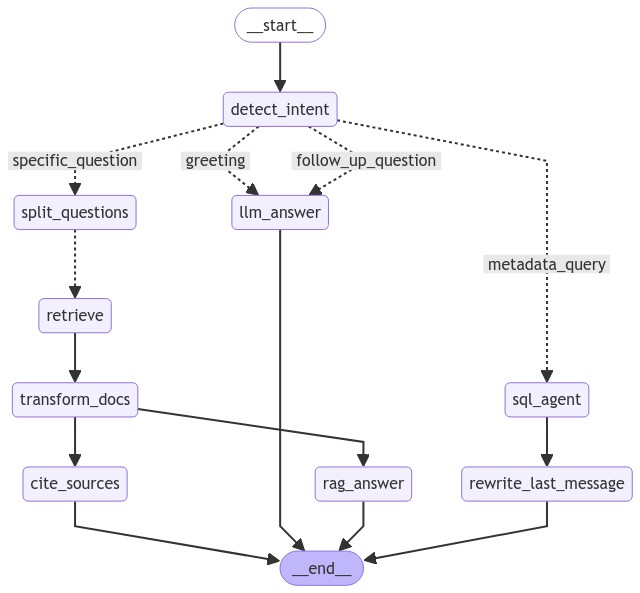

{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'fa9325b9-85d6-4002-acb7-d2ccc5a50f24', 'graph_node': '__start__', 'data': 'Processing __start__...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': 'ad74d392-bd8e-447a-8ab3-3ce6141d6c56', 'graph_node': 'detect_intent', 'data': 'Processing detect_intent...'}


2024-09-04 22:10:45,115 - LangGraph - INFO - Intent detection response: specific_question


{'intent': 'specific_question', 'messages': [HumanMessage(content='Who are the founders of Vectrix and how is the weather in San Francisco?', id='7f5e0585-d956-4296-a95d-061c8cb5b6c9')], 'documents': []}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '9d4b692d-45b8-4e0b-8488-815bc28ae690', 'graph_node': 'split_questions', 'data': 'Processing split_questions...'}


2024-09-04 22:10:46,833 - LangGraph - INFO - Question was split into 1 parts
2024-09-04 22:10:46,839 - LangGraph - INFO - Retrieving documents, for the following questions: ['Who are the founders of Vectrix?', 'How is the weather in San Francisco?']


{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '993452c5-9f2a-48c1-bd8d-5f5e5e39212b', 'graph_node': 'retrieve', 'data': 'Processing retrieve...'}


2024-09-04 22:10:47,350 - LangGraph - INFO - Retrieved 0 documents from vector search
2024-09-04 22:10:47,355 - LangGraph - INFO - Retrieved 0 documents from vector search
2024-09-04 22:10:50,129 - LangGraph - INFO - Web search returned 5 documents


[{'index': 0, 'relevance_score': 0.9999896}, {'index': 1, 'relevance_score': 0.99998826}, {'index': 2, 'relevance_score': 0.9999501}]


2024-09-04 22:10:51,279 - LangGraph - INFO - Web search returned 5 documents


[{'index': 0, 'relevance_score': 0.9974191}, {'index': 1, 'relevance_score': 0.8059378}, {'index': 3, 'relevance_score': 0.7699463}]
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '7dff8b61-8f79-4a26-ae54-fad31bd239f7', 'graph_node': 'transform_docs', 'data': 'Processing transform_docs...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '140e54c7-c0bb-4204-8a39-138a7d87c61c', 'graph_node': 'cite_sources', 'data': 'Processing cite_sources...'}
{'type': 'progress', 'model_provider': '', 'model_name': '', 'run_id': '4fb7976c-1332-47ab-baa3-569098c9d608', 'graph_node': 'rag_answer', 'data': 'Processing rag_answer...'}


2024-09-04 22:10:52,197 - StreamProcessor - ERROR - Resource not found for /runs/140e54c7-c0bb-4204-8a39-138a7d87c61c. HTTPError('404 Client Error: Not Found for url: https://api.smith.langchain.com/runs/140e54c7-c0bb-4204-8a39-138a7d87c61c', '{"detail":"Run not found"}')


{'type': 'final_output', 'model_provider': '', 'model_name': '', 'run_id': '140e54c7-c0bb-4204-8a39-138a7d87c61c', 'graph_node': 'cite_sources', 'data': [], 'trace_id': '140e54c7-c0bb-4204-8a39-138a7d87c61c', 'trace_url': ''}


KeyError: 'source'

In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
from IPython.display import Image, display
from langchain_core.messages import HumanMessage
from searchflow.graphs import default_graph
from searchflow.streaming.processor import StreamProcessor
import warnings
warnings.simplefilter("ignore", ResourceWarning)
os.environ["LANGCHAIN_TRACING_V2"] = "true"

# Display the graph
display(Image(default_graph.get_graph().draw_mermaid_png()))

stream = StreamProcessor(graph=default_graph, project_name="Vectrix", internet_search=True)

# Set the input message
input = [HumanMessage(content="Who are the founders of Vectrix and how is the weather in San Francisco?")]

# Run the stream and print the chunks
async for chunk in stream.process_stream(messages=input):
    print(chunk)